## **Unsupervised Learning: K-Means Clustering (BaskinRobbins dataset)**
* Baskin Robbins nutritional information from http://www.baskinrobbins.ca/nutritional-information/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.1.5
numpy   version = 1.19.5
seaborn version = 0.11.1


In [3]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/BaskinRobbins.tsv', sep='\t')
df.sample(10)

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Sugar Alcohol (g)
23,Fudge Brownie,180,12.0,0.3,18,13,3.0,NaN
0,Bananas Foster,160,8.0,0.2,20,16,2.0,NaN
19,Cookies ‘n Cream,270,17.0,0.4,25,18,5.0,NaN
25,Gold Medal Ribbon,240,12.0,0.4,30,23,4.0,NaN
20,Cotton Candy,240,12.0,0.4,31,20,4.0,NaN
48,Praline ‘n Cream,270,14.0,0.4,32,26,4.0,NaN
15,Chocolate Hazelnut Truffle,280,17.0,0.4,29,20,5.0,NaN
53,Reese® NHL® Power Play,330,21.0,0.4,30,23,8.0,NaN
64,NF Vanilla Yogurt,130,0.4,0.0,25,20,6.0,NaN
26,Green Tea,140,9.0,0.3,13,10,3.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
 7   Sugar Alcohol (g)  3 non-null      float64
dtypes: float64(4), int64(3), object(1)
memory usage: 4.5+ KB


In [5]:
df.drop(columns=['Sugar Alcohol (g)'], inplace=True)
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,Bananas Foster,160,8.0,0.2,20,16,2.0
1,Baseball Nut,160,9.0,0.2,19,13,3.0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0


In [6]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)'],
      dtype='object')

In [7]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']

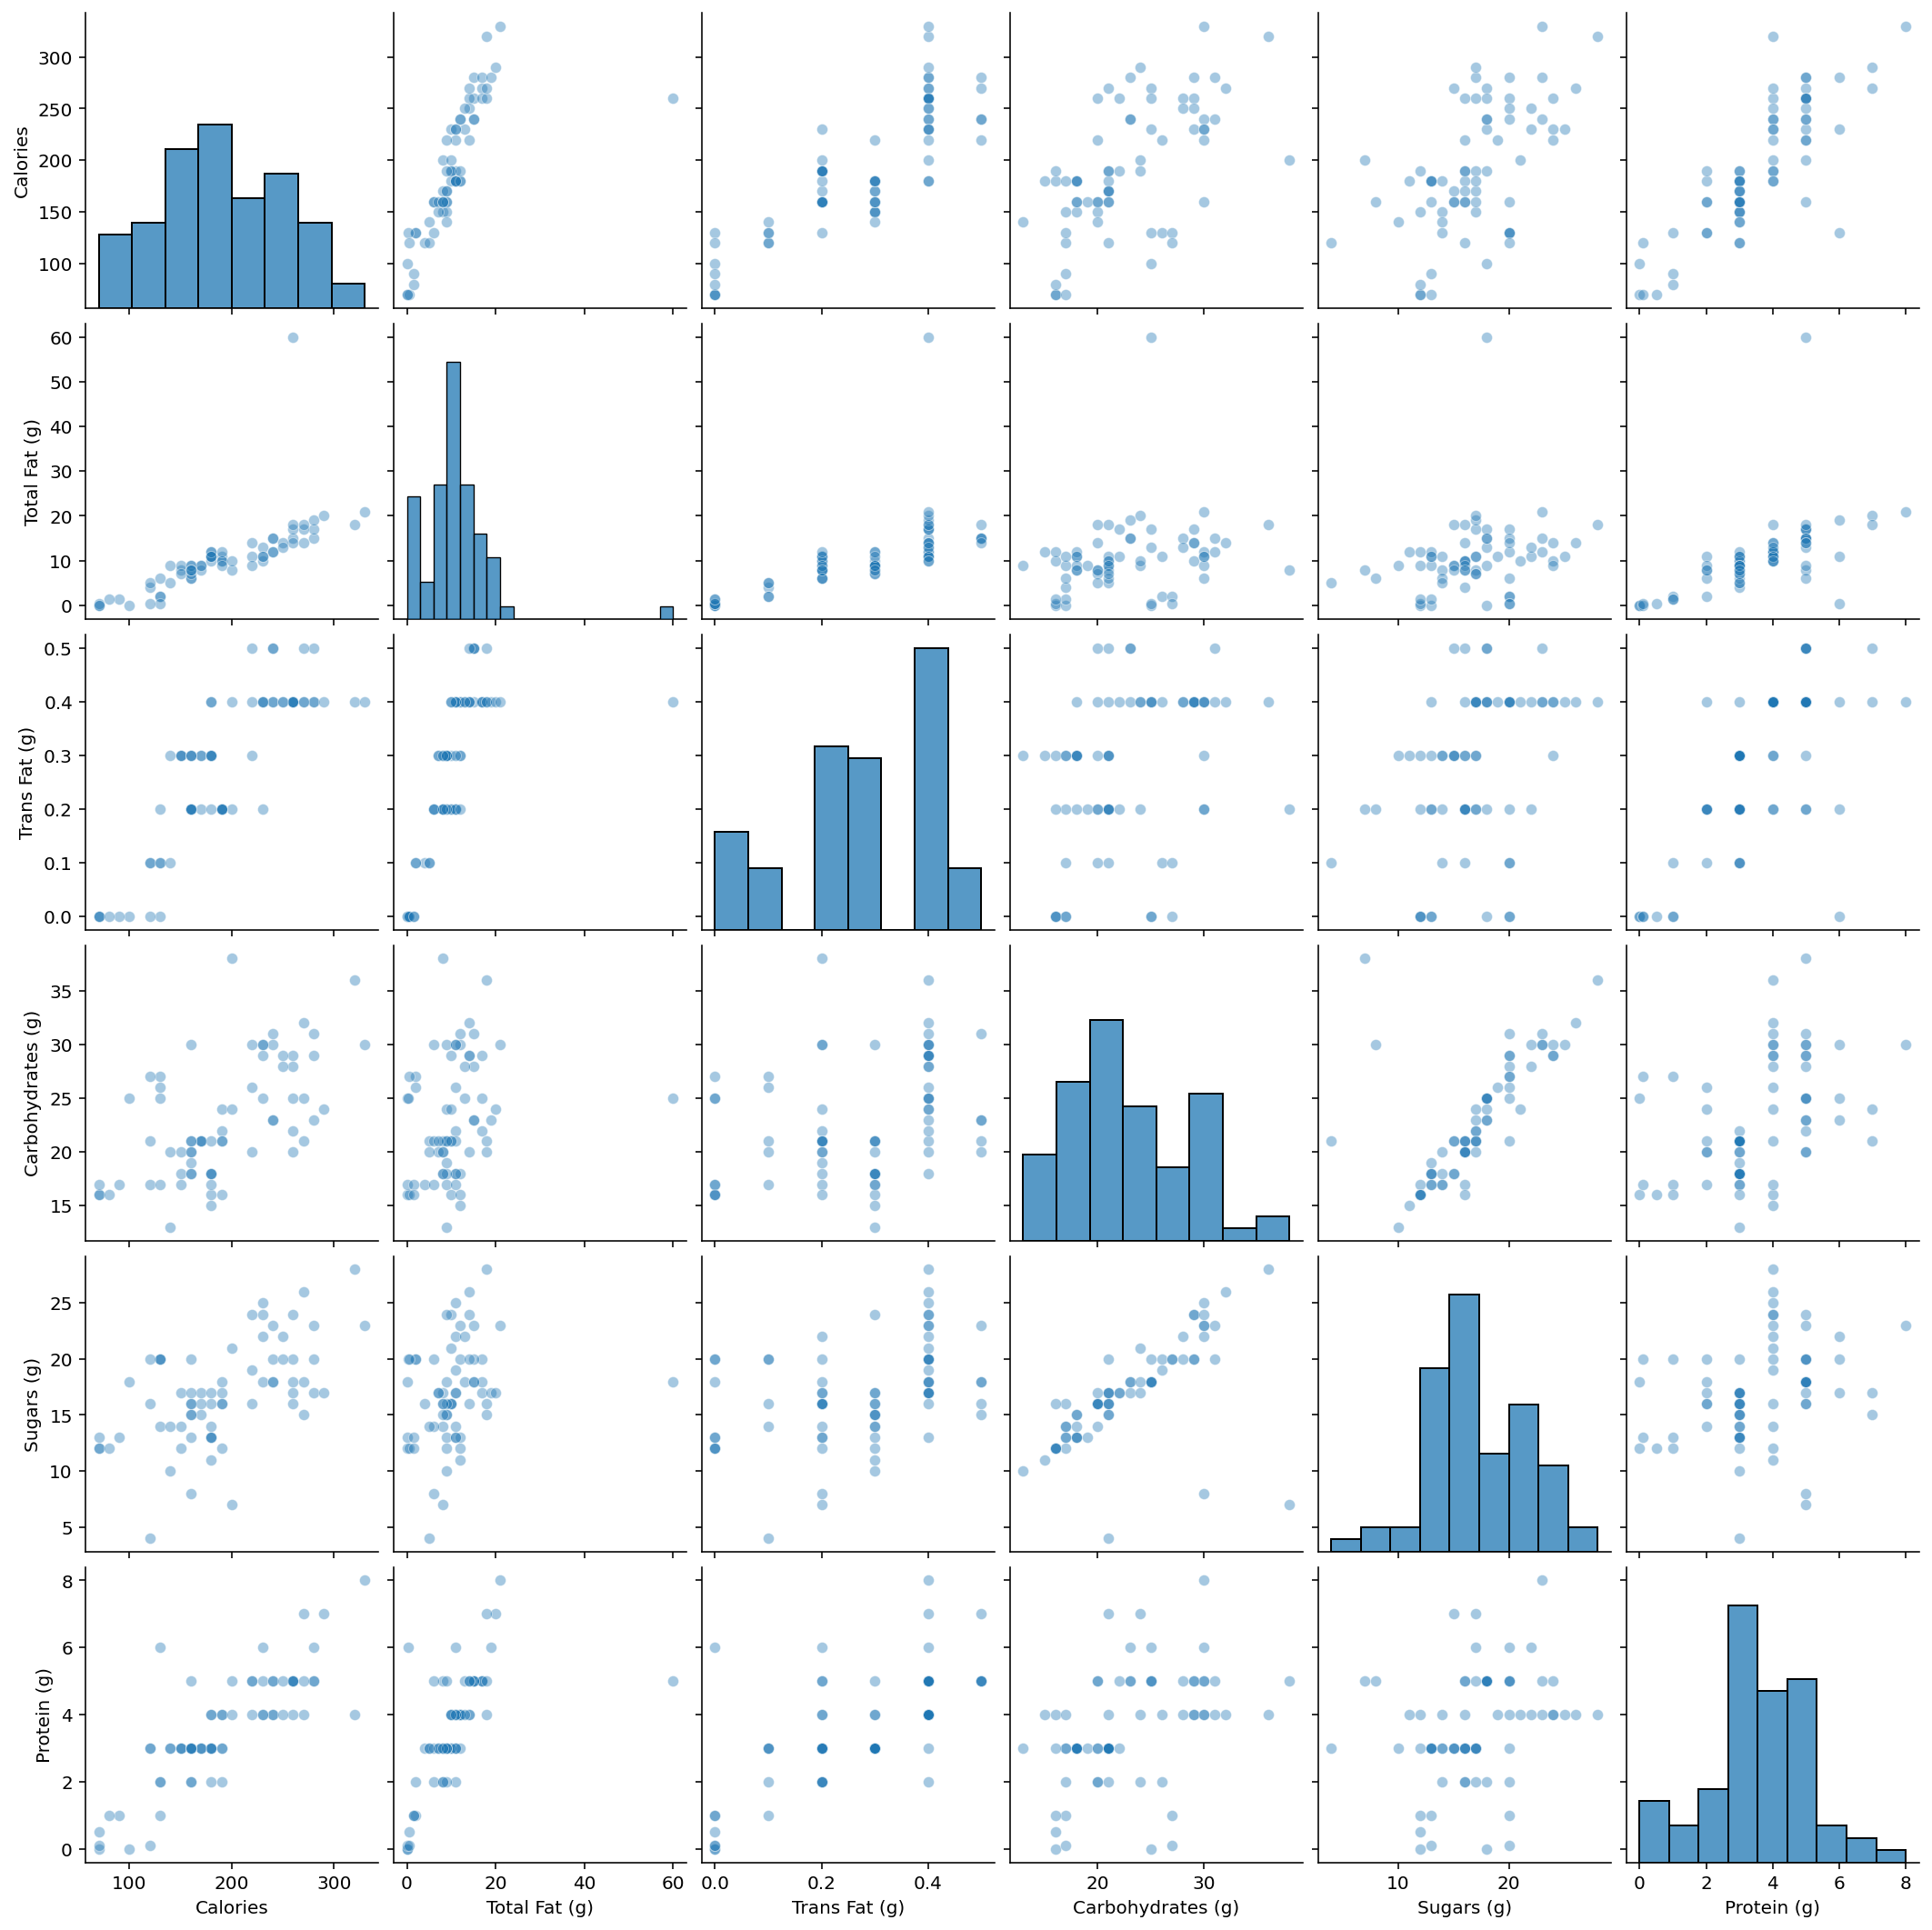

In [8]:
sns.pairplot(df, vars=cols, 
             plot_kws={'alpha': .4});

## **Scikit-learn: KMeans Clustering**

In [9]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [10]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)'],
      dtype='object')

In [11]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
## z-score
scaler = preprocessing.StandardScaler() # create StandardScaler instance
z=scaler.fit_transform(df[cols]) # calc z-score
z[:5].round(4) # 2D numpy array

array([[-0.5182, -0.3248, -0.5335, -0.5358, -0.2048, -0.94  ],
       [-0.5182, -0.1981, -0.5335, -0.7206, -0.8767, -0.3402],
       [-0.3548, -0.1981,  0.1581, -0.3511, -0.4287, -0.3402],
       [-1.1718, -0.8318, -1.2251, -1.0902, -0.2048, -0.3402],
       [-1.0084, -1.0852, -1.2251,  0.5728,  0.6911, -0.94  ]])

In [12]:
## Yeo-Johnson transformation (preferable)
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True) # support only positive value
mat = pt.fit_transform(df[cols])
mat[:5].round(4)

array([[-0.4998, -0.1914, -0.644 , -0.4474, -0.2191, -0.9432],
       [-0.4998, -0.0397, -0.644 , -0.6723, -0.8836, -0.3465],
       [-0.3343, -0.0397,  0.0461, -0.2353, -0.4421, -0.3465],
       [-1.1757, -0.92  , -1.2227, -1.1663, -0.2191, -0.3465],
       [-1.0044, -1.417 , -1.2227,  0.6729,  0.6865, -0.9432]])

In [13]:
bc_cols = [f'bc_{c}' for c in cols]
bc_cols

['bc_Calories',
 'bc_Total Fat (g)',
 'bc_Trans Fat (g)',
 'bc_Carbohydrates (g)',
 'bc_Sugars (g)',
 'bc_Protein (g)']

In [14]:
z_cols = [f'z_{c}' for c in cols]
z_cols

['z_Calories',
 'z_Total Fat (g)',
 'z_Trans Fat (g)',
 'z_Carbohydrates (g)',
 'z_Sugars (g)',
 'z_Protein (g)']

In [15]:
ds=pd.concat([df, pd.DataFrame(mat, columns=bc_cols), pd.DataFrame(z, columns=z_cols)], axis='columns')
ds.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),bc_Calories,bc_Total Fat (g),bc_Trans Fat (g),bc_Carbohydrates (g),bc_Sugars (g),bc_Protein (g),z_Calories,z_Total Fat (g),z_Trans Fat (g),z_Carbohydrates (g),z_Sugars (g),z_Protein (g)
0,Bananas Foster,160,8.0,0.2,20,16,2.0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181,-0.518194,-0.324811,-0.533530,-0.535844,-0.204771,-0.94002
1,Baseball Nut,160,9.0,0.2,19,13,3.0,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462,-0.518194,-0.198073,-0.533530,-0.720618,-0.876675,-0.34019
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462,-0.354799,-0.198073,0.158083,-0.351070,-0.428739,-0.34019
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,-1.175713,-0.919995,-1.222738,-1.166310,-0.219051,-0.346462,-1.171772,-0.831762,-1.225143,-1.090165,-0.204771,-0.34019
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,-1.004409,-1.417016,-1.222738,0.672892,0.686477,-0.943181,-1.008377,-1.085238,-1.225143,0.572799,0.691102,-0.94002


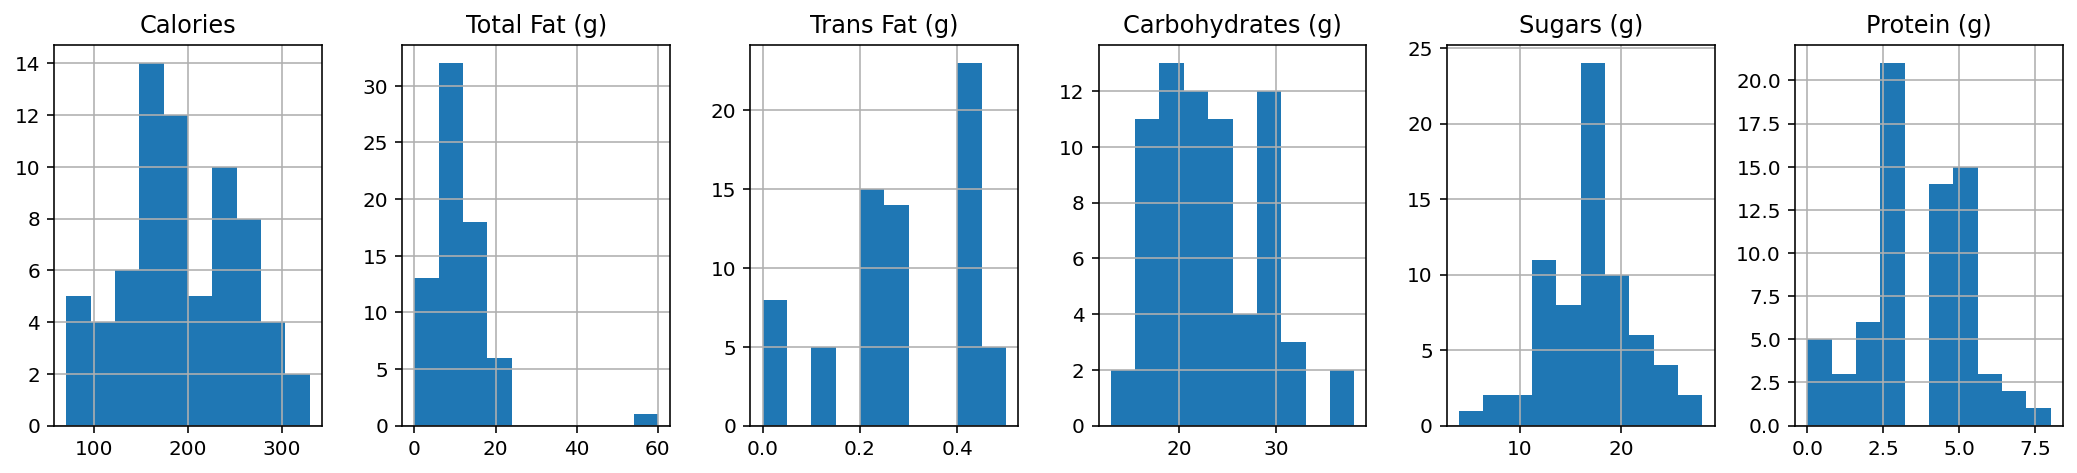

In [16]:
ds[cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5));

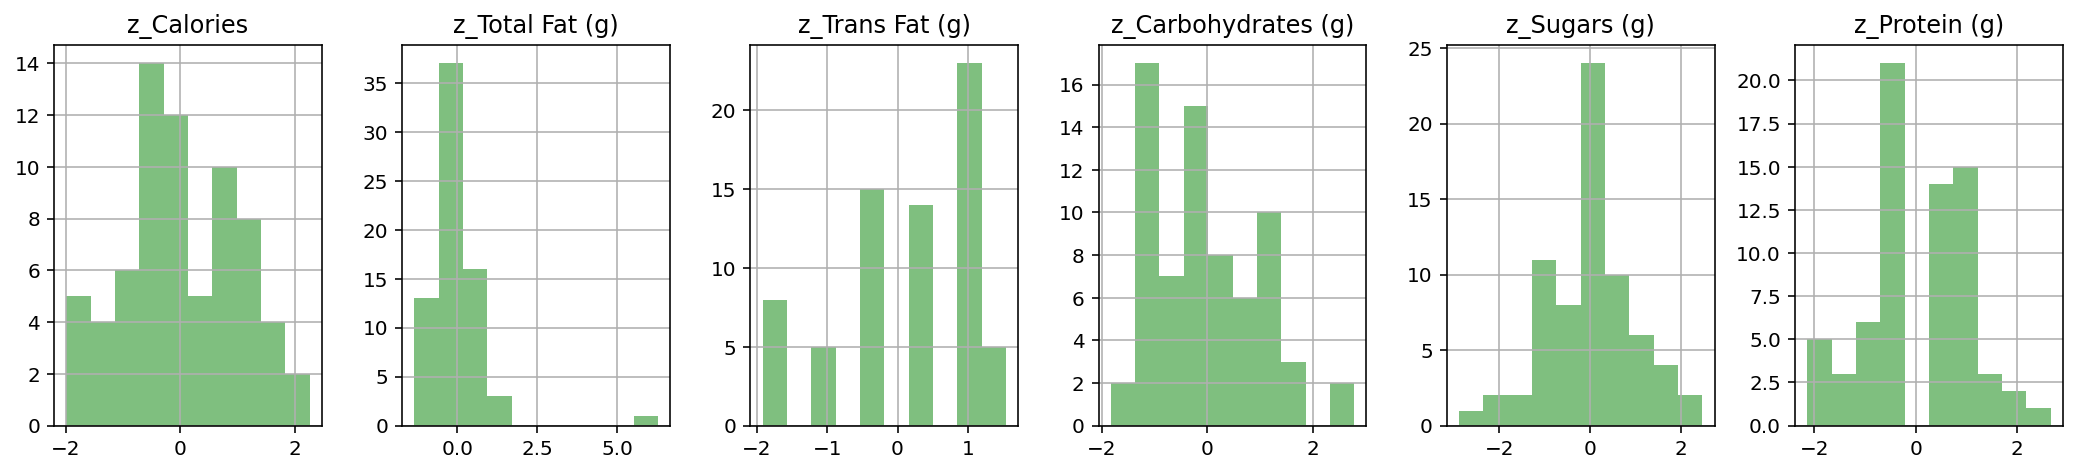

In [17]:
ds[z_cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5), color='green', alpha=.5);

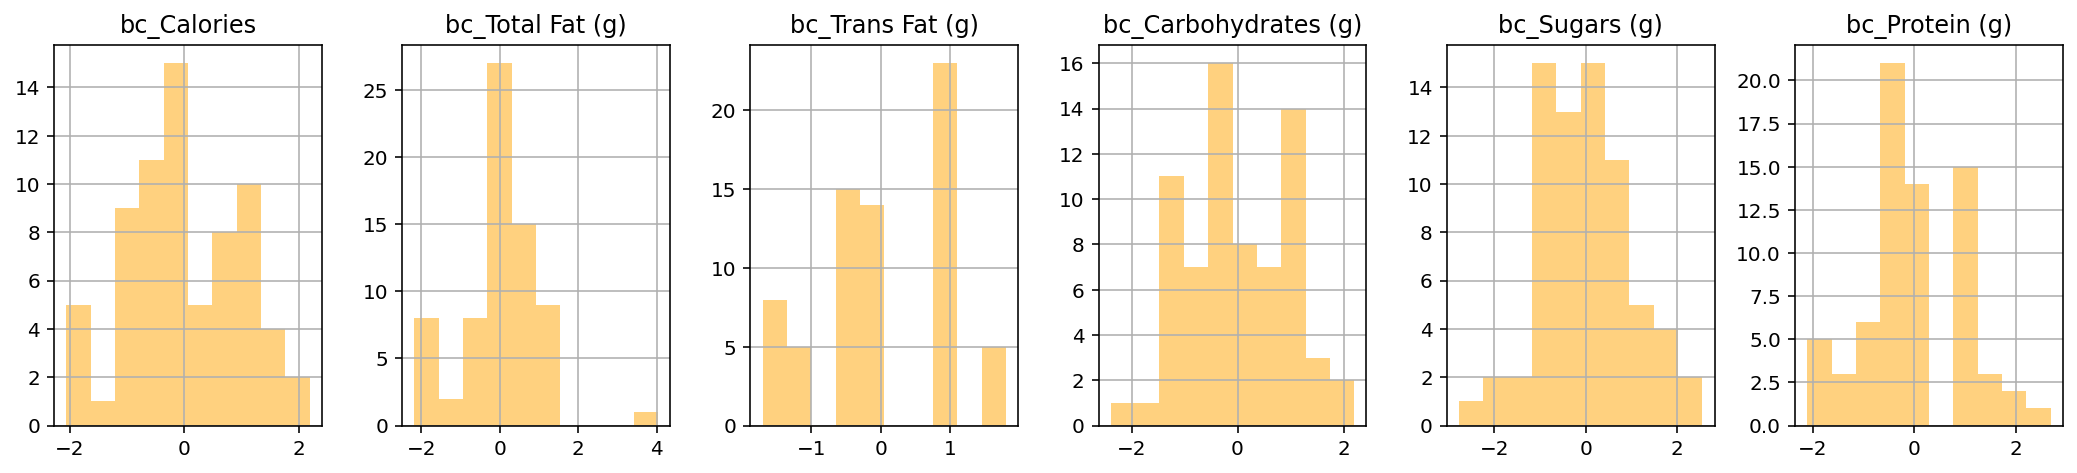

In [18]:
ds[bc_cols].hist(layout=(1, len(cols)), figsize=(3*len(cols), 3.5), color='orange', alpha=.5);

In [19]:
X=pd.DataFrame(mat, columns=cols) ## power transformation (preferable)
# X=pd.DataFrame(z, columns=cols) ## z-score
X.head()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181
1,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462
2,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462
3,-1.175713,-0.919995,-1.222738,-1.166310,-0.219051,-0.346462
4,-1.004409,-1.417016,-1.222738,0.672892,0.686477,-0.943181


## **scatter matrix with transformed data**

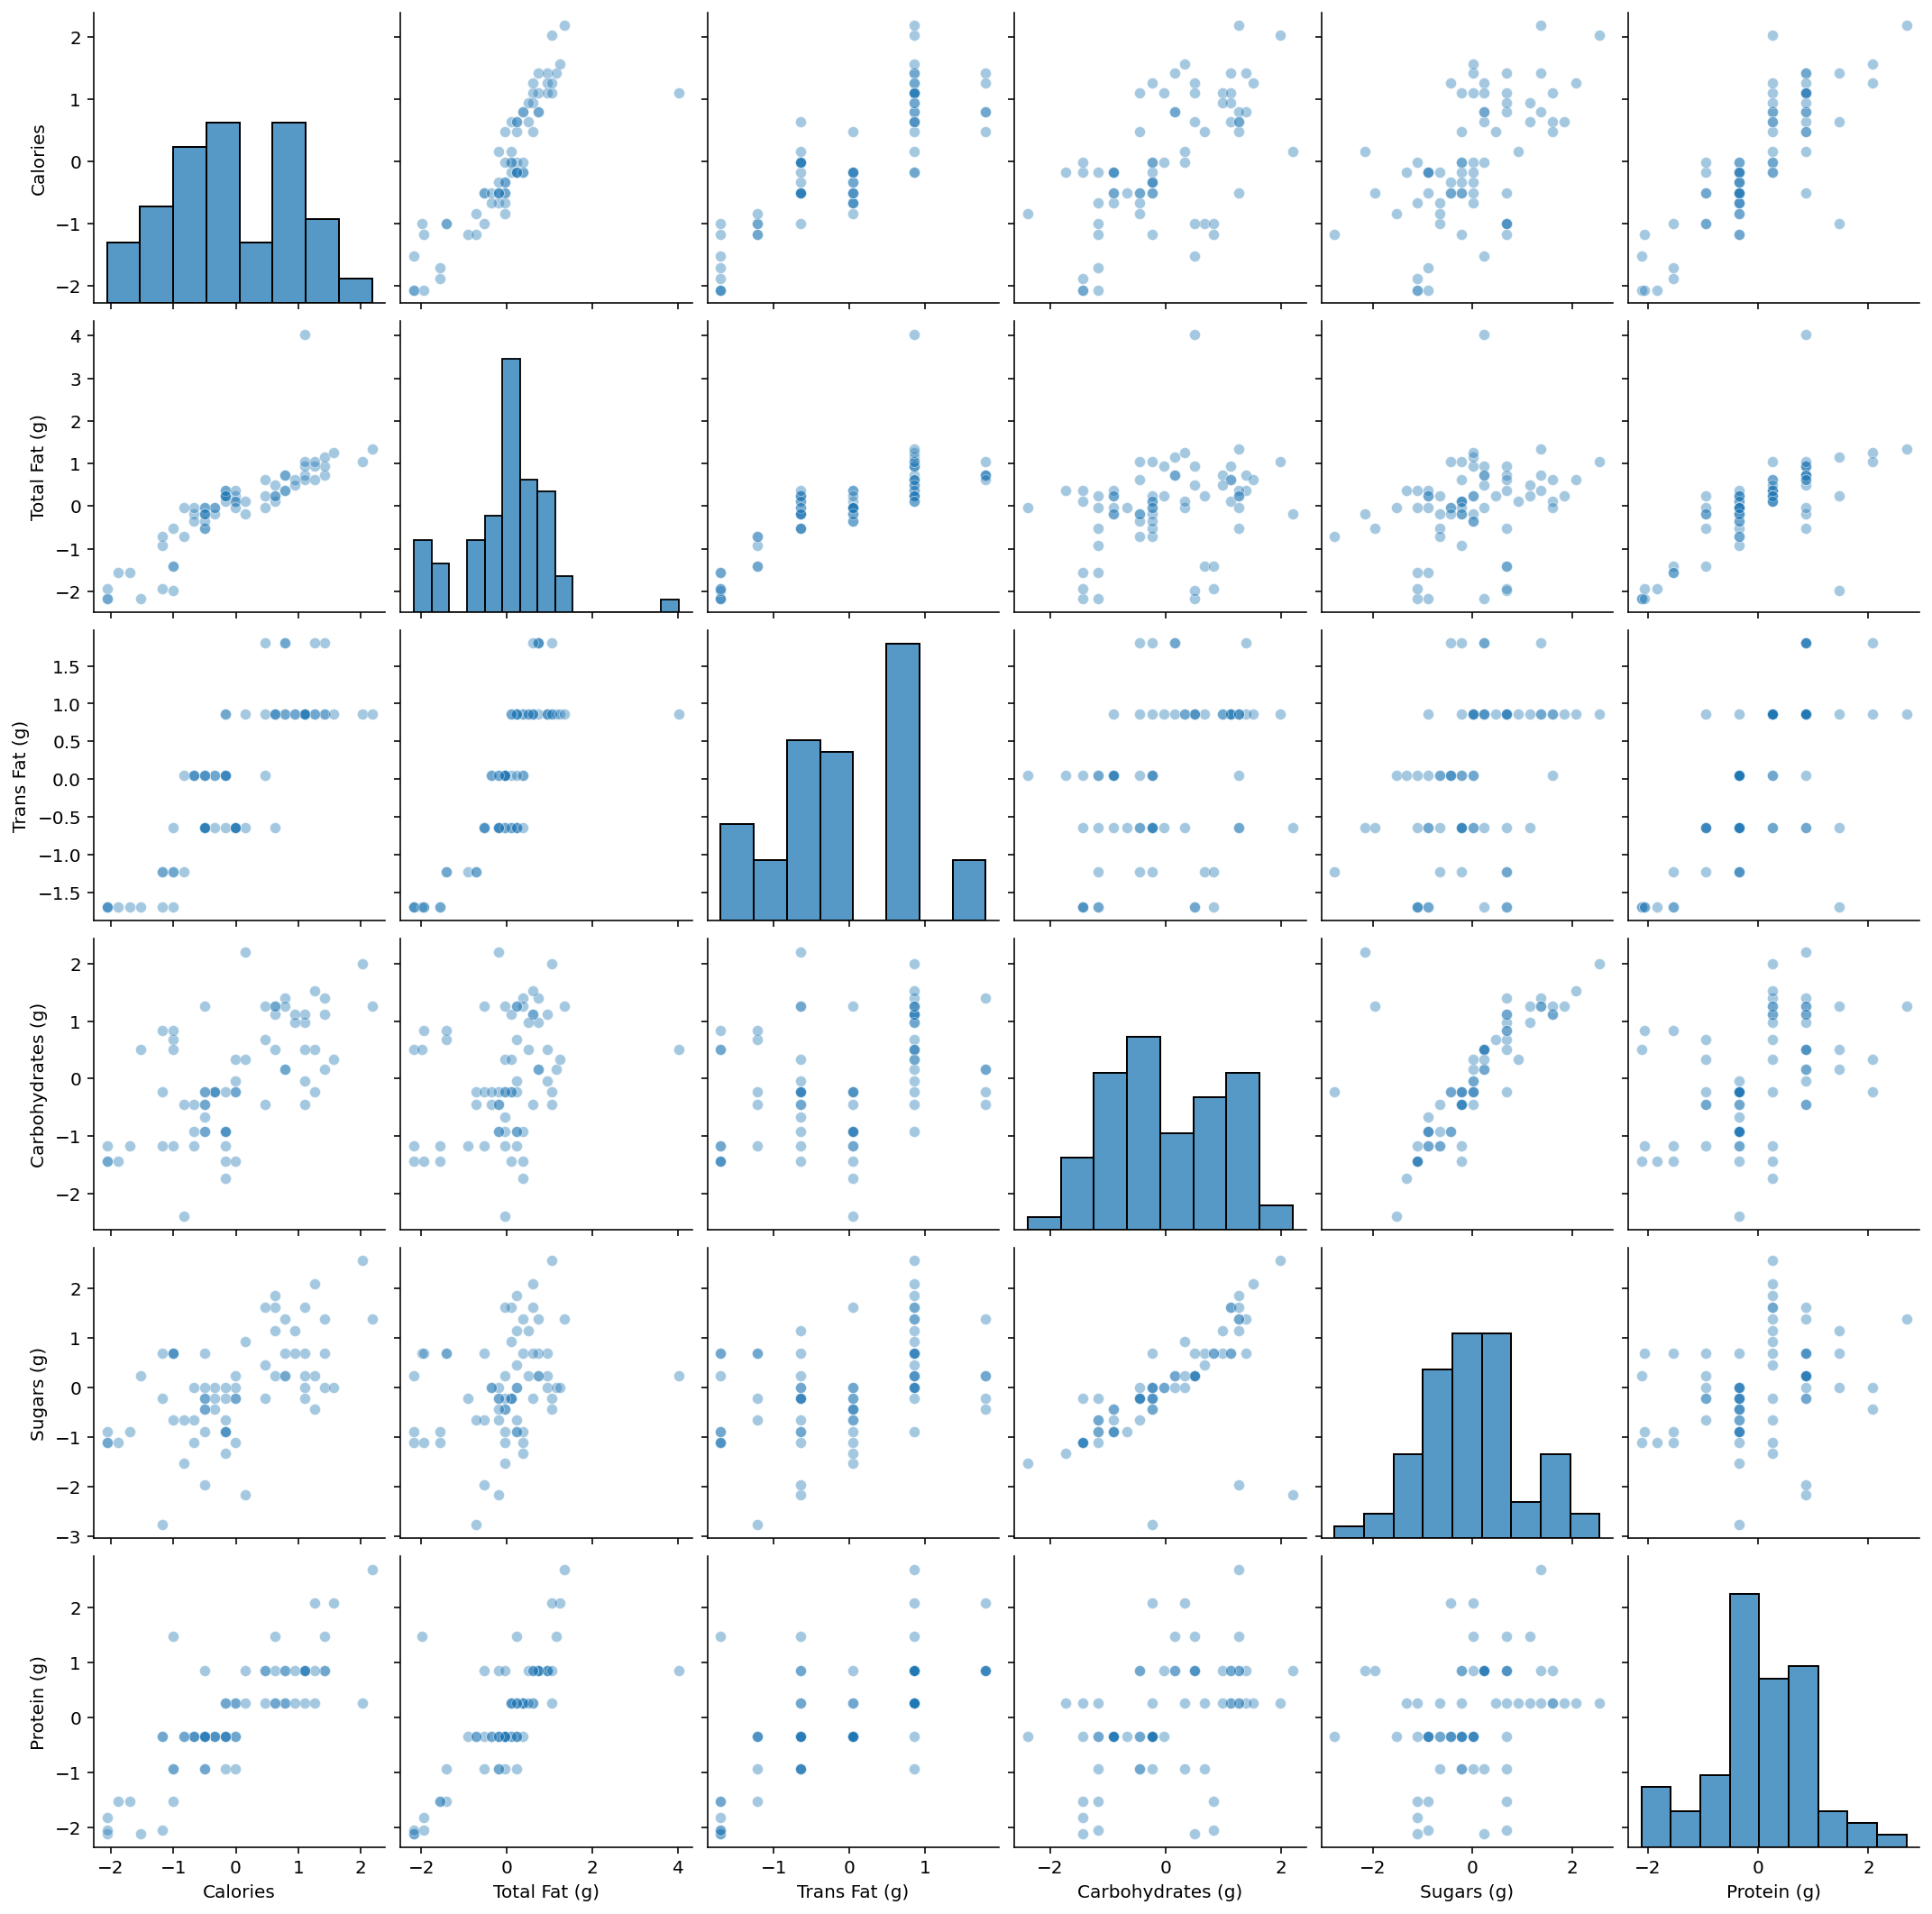

In [20]:
sns.pairplot(X, 
             plot_kws={'alpha': .4});

## **Scikit-learn: KMeans Clustering**

In [21]:
from sklearn.cluster import KMeans

## **Optimal number of clusters**

In [22]:
ssd=[]
for k in range(2, 10):
    m=KMeans(n_clusters=k)
    m.fit(X)
    ssd.append([k, m.inertia_])
ssd

[[2, 212.64279113095122],
 [3, 155.97536067062356],
 [4, 131.65474381217098],
 [5, 109.36406208600857],
 [6, 90.82567209552687],
 [7, 79.39837192293686],
 [8, 70.26592875867281],
 [9, 65.1174616321795]]

In [23]:
xy=np.array(ssd)
print(xy)

[[  2.         212.64279113]
 [  3.         155.97536067]
 [  4.         131.65474381]
 [  5.         109.36406209]
 [  6.          90.8256721 ]
 [  7.          79.39837192]
 [  8.          70.26592876]
 [  9.          65.11746163]]


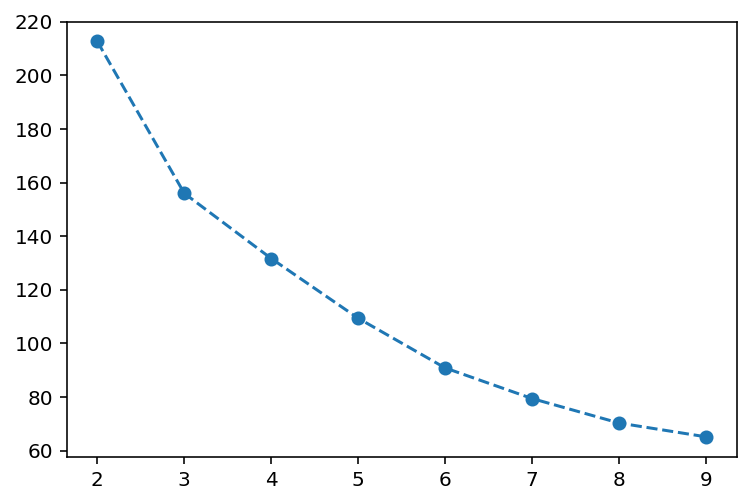

In [24]:
plt.plot(xy[:, 0], xy[:, 1], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')

In [25]:
dd=pd.DataFrame(ssd, columns=['k', 'ssd'])
dd

,k,ssd
0,2,212.642791
1,3,155.975361
2,4,131.654744
3,5,109.364062
4,6,90.825672
5,7,79.398372
6,8,70.265929
7,9,65.117462


In [26]:
dd['pct_chg']=dd['ssd'].pct_change() * 100
dd

,k,ssd,pct_chg
0,2,212.642791,NaN
1,3,155.975361,-26.649119
2,4,131.654744,-15.592602
3,5,109.364062,-16.931165
4,6,90.825672,-16.951080
5,7,79.398372,-12.581575
6,8,70.265929,-11.502053
7,9,65.117462,-7.327117


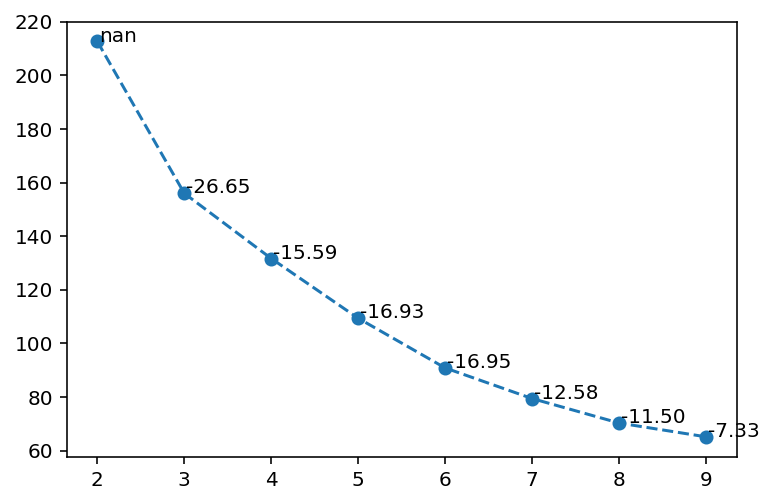

In [27]:
plt.plot(dd['k'], dd['ssd'], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')
for index, row in dd.iterrows():
    plt.text(row['k']+.02, row['ssd']+.02, f'{row["pct_chg"]:.2f}', fontsize=10)

## fit the model

In [28]:
model = KMeans(n_clusters=3)
model
# X=df[cols]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
model.cluster_centers_.round(4)

array([[-0.4093, -0.1074, -0.324 , -0.5609, -0.6265, -0.2892],
       [ 1.0208,  0.7778,  0.9435,  0.7589,  0.7909,  0.8394],
       [-1.5485, -1.8342, -1.605 , -0.33  , -0.2096, -1.425 ]])

In [31]:
model.transform(X) # the distance between each point and centroid

array([[0.8510254 , 3.38003665, 2.22891027],
       [0.44375572, 3.42920514, 2.64161598],
       [0.53899753, 2.68797166, 2.94049125],
       [1.60971142, 4.30496741, 1.72730412],
       [2.55945588, 4.09969758, 1.63009151],
       [0.58112177, 3.3020949 , 2.81242916],
       [2.54226966, 5.17795727, 3.04371205],
       [0.78971948, 2.88230237, 2.51295897],
       [3.42776273, 3.87618946, 4.68815556],
       [2.3012883 , 1.02624737, 4.3289111 ],
       [1.03172164, 2.55318582, 2.98306453],
       [2.45952729, 0.78263417, 4.7301037 ],
       [3.03860246, 1.21127176, 5.41386831],
       [4.21012426, 1.28332786, 6.1398813 ],
       [0.89644415, 3.60787468, 3.06312134],
       [3.4259425 , 0.58293092, 5.54534523],
       [0.68732081, 3.35078705, 3.0134846 ],
       [3.55237834, 5.5930566 , 1.22435935],
       [0.76427502, 2.72866365, 2.86837044],
       [2.91712779, 0.68691377, 5.27575522],
       [2.98638999, 0.99156408, 4.79693473],
       [1.58347506, 2.54910642, 3.54314424],
       [1.

In [32]:
model.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 2, 1, 2, 2, 1, 0, 2, 1,
       2, 2, 0, 1], dtype=int32)

## **sense making about each cluster**